In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **For Tabular Dataset**

#Task 1. Exploratory Data Analysis (EDA):

#The Data

In [3]:
df=pd.read_csv('/content/LoanDataset - LoansDatasest.csv')

In [4]:
df.head(5)

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [6]:
df.describe()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.142746,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [7]:
df.shape

(32586, 13)

In [8]:
df.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

##Scatter Plot

In [9]:
df = pd.DataFrame(df)

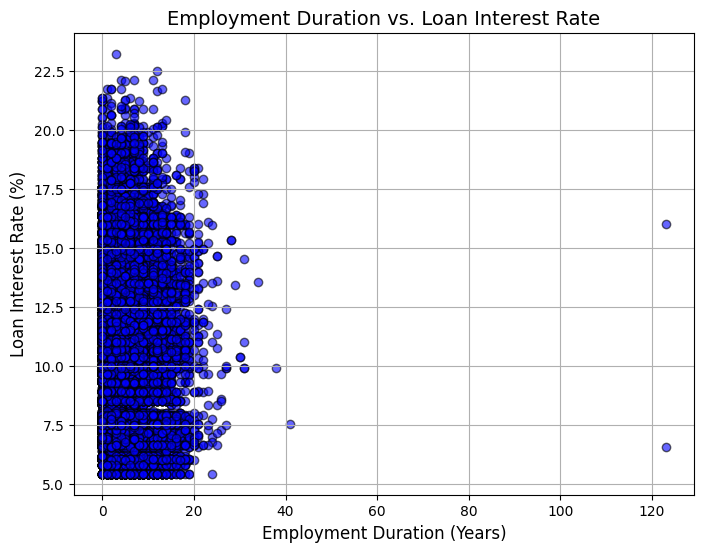

In [10]:
# Scatter Plot: Loan Interest Rate vs. Employment Duration

plt.figure(figsize=(8, 6))
plt.scatter(df['employment_duration'], df['loan_int_rate'], alpha=0.6, color='blue', edgecolor='k')
plt.title('Employment Duration vs. Loan Interest Rate', fontsize=14)
plt.xlabel('Employment Duration (Years)', fontsize=12)
plt.ylabel('Loan Interest Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

##Histogram

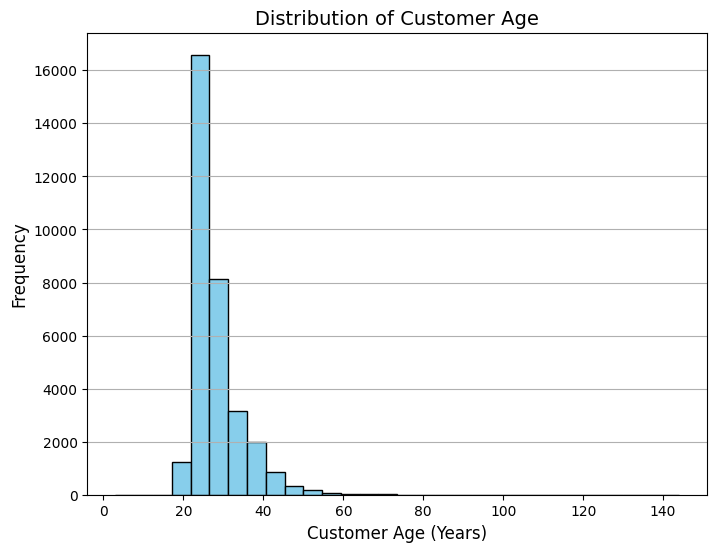

In [11]:
# Histogram: Customer Age

plt.figure(figsize=(8,6))
plt.hist(df['customer_age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age', fontsize=14)
plt.xlabel('Customer Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

##Bar chart

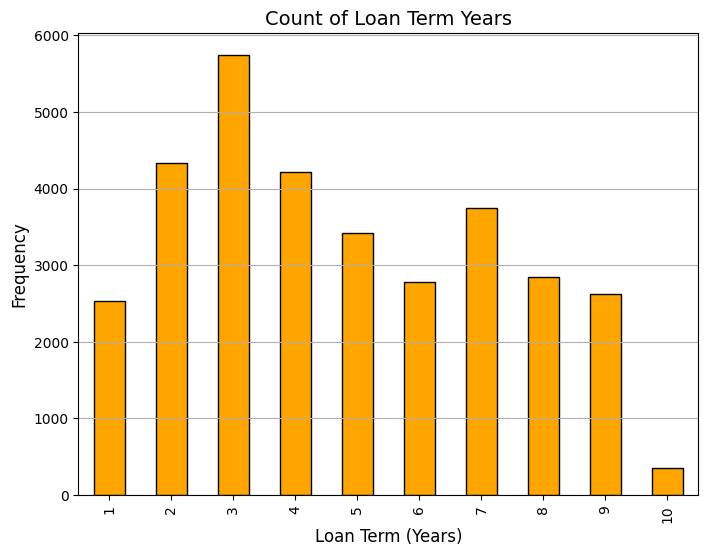

In [12]:
# Bar Chart: Loan Term Years

term_counts = df['term_years'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
term_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Count of Loan Term Years', fontsize=14)
plt.xlabel('Loan Term (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

##Pie chart

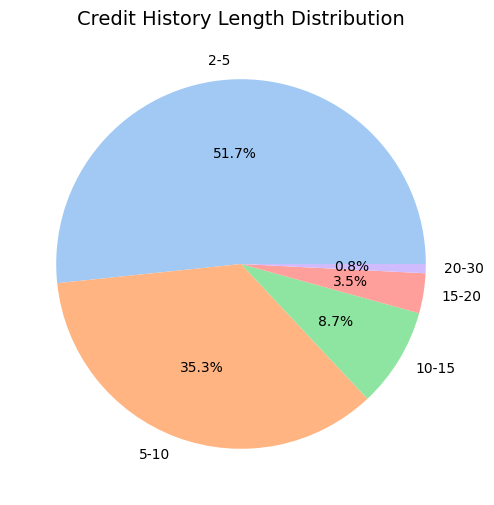

In [13]:
# Pie Chart: Credit History Length

cred_hist_bins = pd.cut(df['cred_hist_length'], bins=[2, 5, 10, 15, 20, 30], labels=['2-5', '5-10', '10-15', '15-20', '20-30'])
cred_hist_pie = cred_hist_bins.value_counts()

plt.figure(figsize=(8, 6))
cred_hist_pie.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Credit History Length Distribution', fontsize=14)
plt.ylabel('')
plt.show()

##Heat map

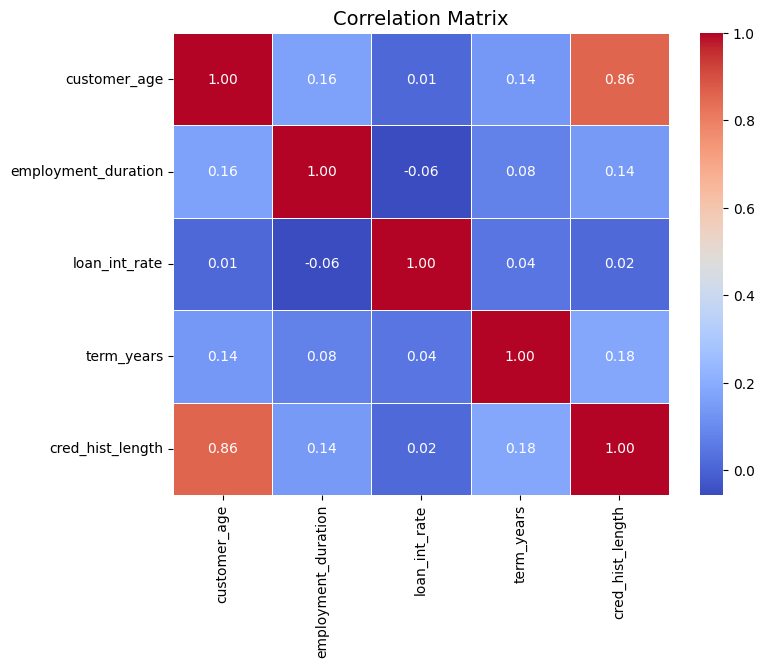

In [14]:
numerical_columns = [
   "customer_age",
   "employment_duration",
   "loan_int_rate",
   "term_years",
   "cred_hist_length",
]

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

#Task 2. Data Preprocessing:

##Perform Data Preprocessing steps from the assignment 2.

##Replace the Null values. Print the total count after and before removing the null values.

In [15]:
# Total count before replacing the null value
df.shape

(32586, 13)

In [16]:
# checking for null values
df.isnull().sum()

,0
customer_id,3
customer_age,0
customer_income,0
home_ownership,0
employment_duration,895
loan_intent,0
loan_grade,0
loan_amnt,1
loan_int_rate,3116
term_years,0


There are 3 null value in customer_id column, 895 null values in employment_duration column, 3116 null values in loan_int_rate column, 20737 null value in historical default column and 4 null value present in current_loan_status column

In [17]:
# replacing null values having dtype object with their corresponding mod value
for i in df.select_dtypes(include='object').columns:
  df[i].fillna(df[i].mode()[0],inplace= True)

<ipython-input-17-7e19d50c8881>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace= True)


In [18]:
# replacing null values having dtype float64 with their corresponding mean value
for i in df.select_dtypes(include='float64').columns:
  df[i].fillna(df[i].mean(), inplace=True)

<ipython-input-18-245bcf58c223>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


In [19]:
df.isnull().sum()

,0
customer_id,0
customer_age,0
customer_income,0
home_ownership,0
employment_duration,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
term_years,0


In [20]:
# Total count after replacing the null values
df.shape

(32586, 13)

##Plot boxplot and identify outliers.

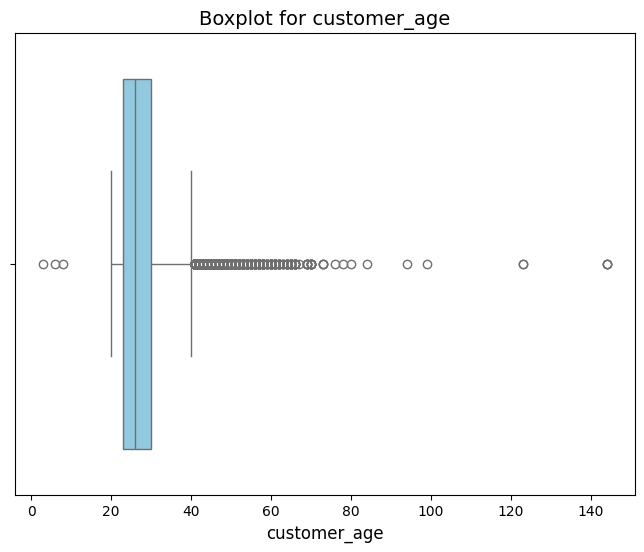

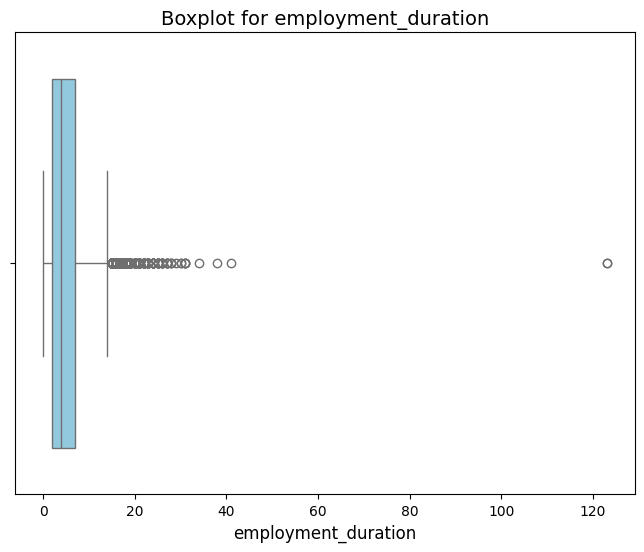

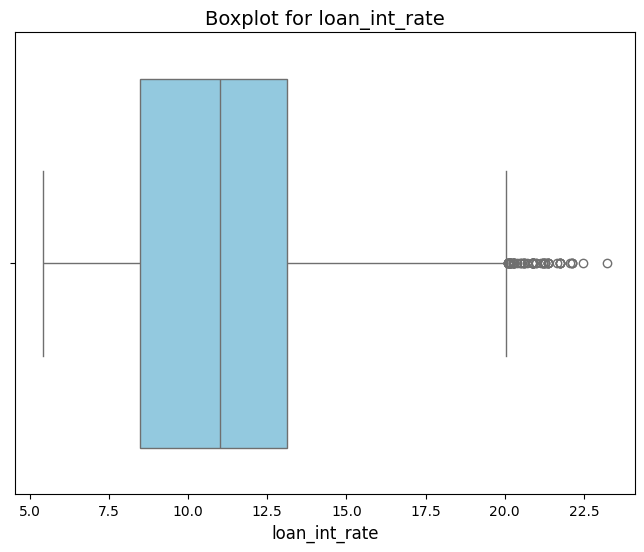

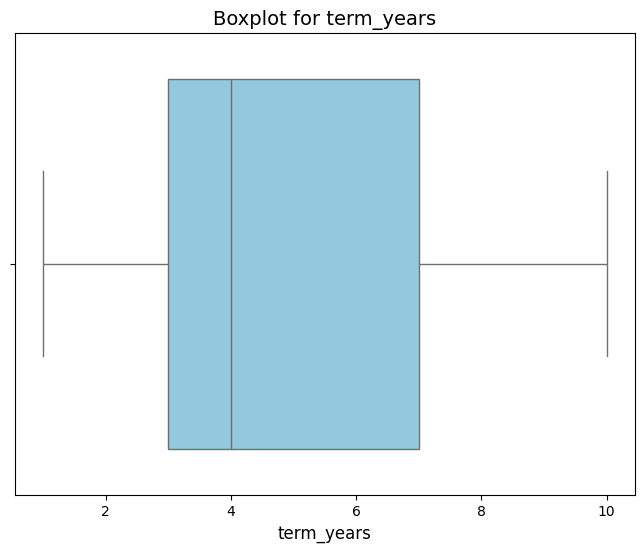

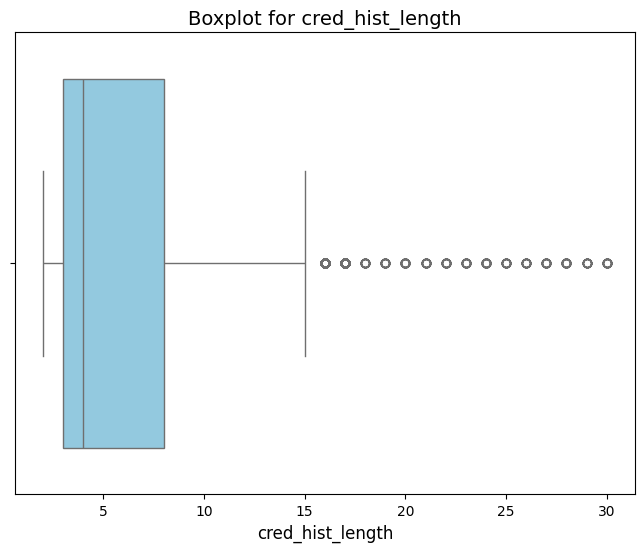

In [21]:
#Boxplot for each numerical column
numerical_columns = ['customer_age', 'employment_duration', 'loan_int_rate', 'term_years', 'cred_hist_length']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f'Boxplot for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.show()

##Scale your data, with Min-Max Scaling or Normalization or Standardization or Robust Scaling (Whichever is appropriate).

In [22]:
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check scaled data
print("Scaled data (first 5 rows):\n", df_scaled[numerical_columns].head())

Scaled data (first 5 rows):
    customer_age  employment_duration  loan_int_rate  term_years  \
0      0.134752             1.000000       0.595506    1.000000   
1      0.127660             0.040650       0.321348    0.000000   
2      0.156028             0.008130       0.418539    0.444444   
3      0.141844             0.032520       0.551124    1.000000   
4      0.148936             0.065041       0.497191    1.000000   

   cred_hist_length  
0          0.035714  
1          0.000000  
2          0.035714  
3          0.000000  
4          0.071429  


In [23]:
df.describe()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32586.000000,32586.000000,32586.000000,32586.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.486631,6.360528,4.085456,3.081611,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8145.250000,23.000000,2.000000,8.490000,3.000000,3.000000
50%,16289.248903,26.000000,4.000000,11.011553,4.000000,4.000000
75%,24432.750000,30.000000,7.000000,13.110000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


##Check class imbalance issue.

In [24]:
if 'loan_status' in df.columns:
    class_counts = df['loan_status'].value_counts()
    print("Class counts:\n", class_counts)

    plt.figure(figsize=(8, 6))
    class_counts.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Class Distribution', fontsize=14)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()
else:
    print("No categorical target column found to check class imbalance.")

No categorical target column found to check class imbalance.


##Split your dataset into train and test set.

In [25]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for i in categorical_columns:
  df[i] = label_encoder.fit_transform(df[i].astype(str))

In [26]:
df.sample(5)

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
3532,3531.0,22,1393,3,2.0,3,2,50,14.84,8,0,2,0
10944,10943.0,24,3449,0,1.0,1,0,716,11.83,4,1,3,1
6448,6447.0,21,2429,0,5.0,1,1,716,13.49,1,1,4,1
17785,17782.0,23,1875,0,1.0,3,0,556,7.68,3,1,3,1
2602,2601.0,24,1738,3,2.0,1,1,461,13.06,4,1,4,1


In [28]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
X_train

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length
31079,38,3278,3,1.0,4,3,35,15.99,8,1,12
24390,31,2429,3,1.0,3,1,35,12.69,1,1,8
13325,22,2228,3,5.0,0,0,351,10.37,2,1,3
1338,26,993,3,1.0,3,1,1,14.65,6,1,3
15564,24,482,0,4.0,0,0,359,11.36,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...
29802,36,1765,2,5.0,4,0,35,6.17,6,1,13
5390,25,2116,0,2.0,3,0,461,6.92,5,1,3
860,24,433,3,2.0,5,2,359,15.99,9,1,3
15795,25,650,0,9.0,4,0,657,11.49,5,1,4


In [ ]:
Y_train

,Current_loan_status
31079,0
24390,1
13325,1
1338,1
15564,1
...,...
29802,1
5390,1
860,0
15795,1


In [32]:
X_test

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length
14326,25,87,0,2.0,0,0,739,11.71,5,1,3
16987,23,2351,3,5.0,1,0,549,11.36,3,1,4
4915,25,1852,3,1.0,0,0,556,11.89,5,1,4
27060,29,1965,3,4.0,5,4,22,19.16,9,1,6
30441,41,2012,3,0.0,5,0,635,7.43,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...
11508,25,3632,2,6.0,3,0,74,8.49,5,1,3
30932,39,3449,0,13.0,0,0,693,7.88,9,0,15
25294,28,3001,3,3.0,4,0,108,6.17,8,1,6
2862,24,1552,2,1.0,2,2,635,16.29,4,1,4


In [33]:
Y_test

,Current_loan_status
14326,1
16987,1
4915,1
27060,1
30441,1
...,...
11508,1
30932,1
25294,1
2862,1


#Task 3. Fit to ML model

##Fit my data to appropriate ML model

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [36]:
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.9579625652040503


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [38]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [39]:
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8636642626975602
Test Accuracy: 0.8583921448297024


In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [42]:
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.9400122737035901


In [43]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train, Y_train)

SVC(random_state=42)

In [44]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [45]:
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.7903943532300138
Test Accuracy: 0.7888922982509973


#Task 4. Evaluation.

##Perform evaluation on different ML models, and different hyperparameters.

In [46]:
#Hyperparameter Tuning for Random Forest using GridSearchCV:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9594522295365124
Test Accuracy: 0.9579625652040503


In [47]:
from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier instance (with or without best parameters)
rf_classifier = RandomForestClassifier(random_state=42)  # Or use best_rf_model from GridSearchCV

# Perform 5-fold cross-validation
scores = cross_val_score(rf_classifier, X, Y, cv=5, scoring='accuracy')

# Print the cross-validation scores and the average score
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.95213256 0.95810956 0.95626822 0.95289244 0.77980666]
Average Accuracy: 0.9198418863723801


In [48]:
# Assuming you have the 'grid_search' object from the previous step
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9579625652040503
Precision: 0.954273982829414
Recall: 0.9943601711396344
F1 Score: 0.9739047619047619


##For classification plot confusion matrix (F1, Accuracy, Precision, Recall, AUC ROC curves) for each model.

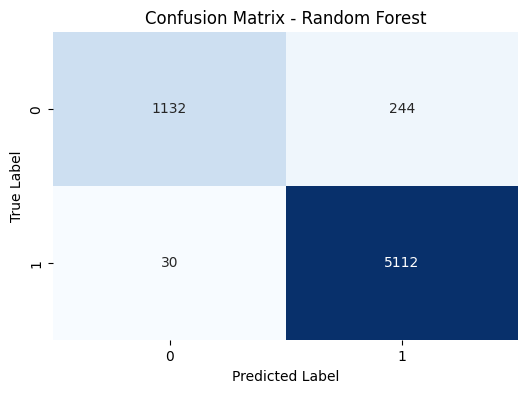

Evaluation Metrics for Random Forest:
Accuracy: 0.9580
Precision: 0.9544
Recall: 0.9942
F1 Score: 0.9739


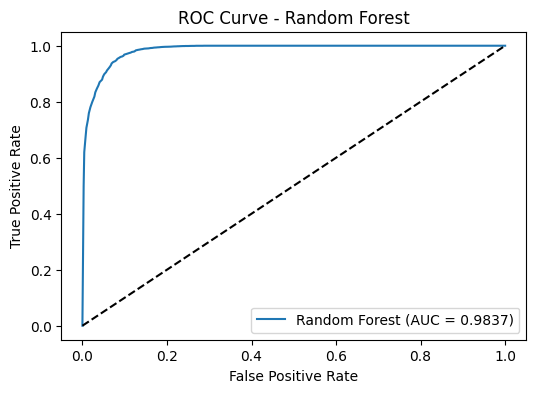

------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


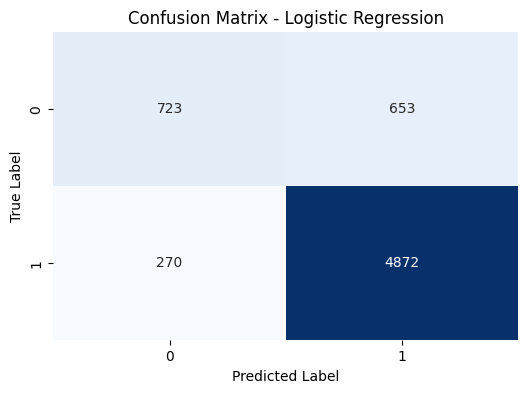

Evaluation Metrics for Logistic Regression:
Accuracy: 0.8584
Precision: 0.8818
Recall: 0.9475
F1 Score: 0.9135


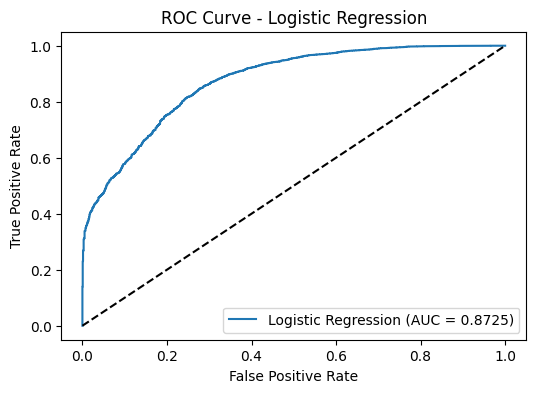

------------------------------


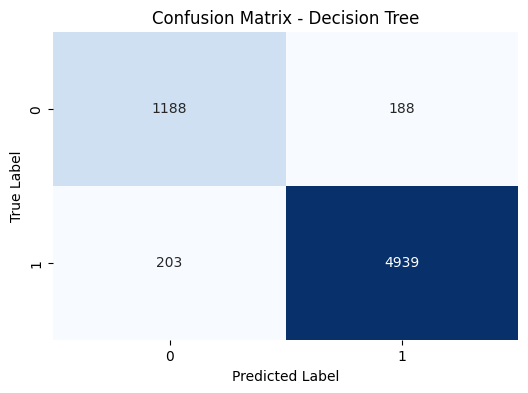

Evaluation Metrics for Decision Tree:
Accuracy: 0.9400
Precision: 0.9633
Recall: 0.9605
F1 Score: 0.9619


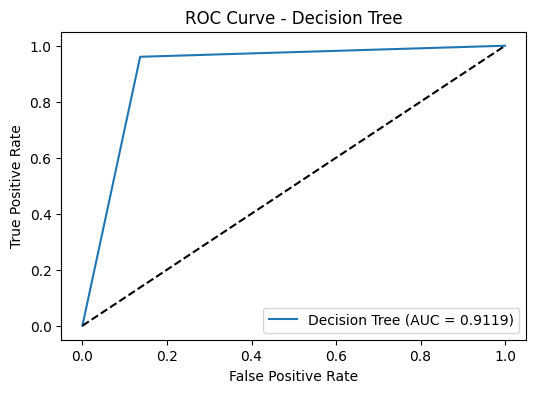

------------------------------


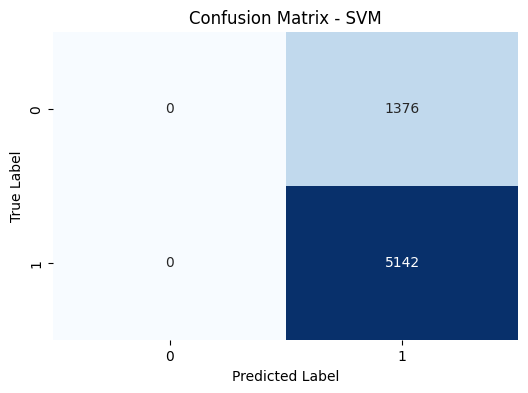

Evaluation Metrics for SVM:
Accuracy: 0.7889
Precision: 0.7889
Recall: 1.0000
F1 Score: 0.8820


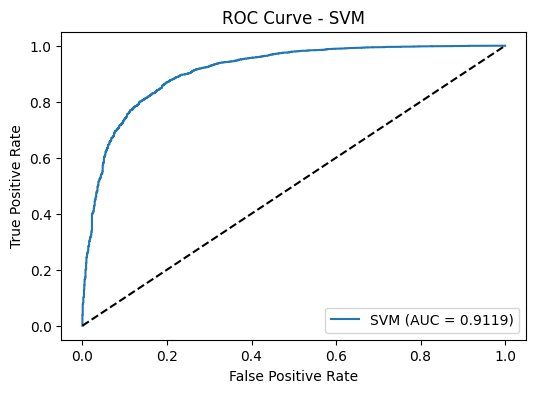

------------------------------


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Evaluation Metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(Y_test, y_prob)
    fpr, tpr, _ = roc_curve(Y_test, y_prob)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    print("-" * 30)

##For regression, find MSE, MAE, RMSE, R-squared (R²) Scores.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate regression metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

# Print the results
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.21110770174900276
MAE: 0.21110770174900276
RMSE: 0.45946458160450493
R-squared: -0.26760015558148575


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
